In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn import svm

### Prepare data

In [3]:
train_set = pd.read_csv('data/train_nx_ig_v3.csv')
X_train = train_set.iloc[:,2:-1]
y_train = train_set.iloc[:,-1]

### CV

In [5]:
clf_svc = svm.LinearSVC(penalty='l2', C=250)
np.mean(cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1'))

0.9502087711891358

### CV - linear, poly, rbf

In [5]:
scores_svc = []
c_range = range(1,300)
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c) # we have only 10 features, so use l2 not l1
    scores_svc.append(np.mean(cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')))

KeyboardInterrupt: 

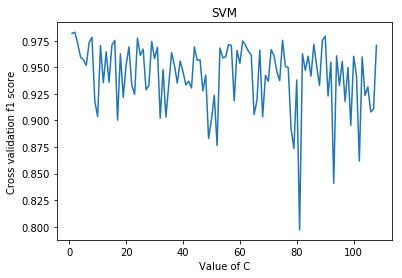

In [10]:
plt.plot(range(1,109), scores_svc)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('SVM')
plt.show()

In [ ]:
scores_svc_poly = []
c_range = range(1,300)
for c in c_range:
    clf_svc_poly = svm.SVC(C=c, kernel='poly', degree=2)
    scores_svc_poly.append(np.mean(cross_val_score(clf_svc_poly, X_train, y_train, cv=5, scoring='f1')))

In [ ]:
plt.plot(c_range, scores_svc_poly)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.show()

In [ ]:
# rbf is too large here
clf_svc_rbf = svm.SVC(kernel='rbf', gamma=0.1)
scores_svc_rbf = cross_val_score(clf_svc_rbf, X_train, y_train, cv=5, scoring='f1')

### Train, predict and output

In [ ]:
clf_svc = svm.LinearSVC(penalty='l2', C=)
# clf_svc_poly = svm.SVC(C=, kernel='poly', degree=2)
clf_svc.fit(X_train, y_train)

In [ ]:
test_set = pd.read_csv('data/test_nx_ig_v3.csv')
X_test = test_set.iloc[:,2:]
y_test = clf_svc.predict(X_test)
# y_test = clf_svc_poly.predict(X_test)

In [ ]:
df = pd.DataFrame(y_test, columns=['category'])
df.index.name = 'id'
df.to_csv('result/svm1.csv', index=True, header=True)
# df.to_csv('result/svm2.csv', index=True, header=False)